### 以下是最近查到的一些关于online learning的文档及应用示例，供查阅。具体应用过程中，有很多参数需要调整。

# Documentation

https://en.wikipedia.org/wiki/Online_machine_learning

http://scikit-learn.org/stable/modules/feature_extraction.html

#### sklearn classes list
http://scikit-learn.org/stable/modules/classes.html

0.  Preprocessing

    1. http://scikit-learn.org/stable/modules/preprocessing.html
    
1.  partial_fit

    1. Introduction: **http://scikit-learn.org/stable/modules/scaling_strategies.html**

    2. Example: http://scikit-learn.org/stable/auto_examples/cluster/plot_dict_face_patches.html

2.  grid search

    1. http://scikit-learn.org/stable/modules/grid_search.html#grid-search

2.  pipline

    1. Definition: 
    
        1. http://scikit-learn.org/stable/modules/pipeline.html#pipeline
        
        2. http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
    
    2. Example: http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html

3. other subjects

    1. numpy.memper: http://stackoverflow.com/questions/16149803/working-with-big-data-in-python-and-numpy-not-enough-ram-how-to-save-partial-r?lq=1
    
    2. kernel_approximation: http://scikit-learn.org/stable/modules/kernel_approximation.html

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:

        Efficiency.
        Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:

        SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
        SGD is sensitive to feature scaling.

https://www.packtpub.com/books/content/machine-learning-0

## Logistic Regression

http://scikit-learn.org/stable/modules/linear_model.html

http://scikit-learn.org/stable/modules/sgd.html#sgd

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:

        loss="hinge": (soft-margin) linear Support Vector Machine,
        loss="modified_huber": smoothed hinge loss,
        loss="log": logistic regression,
        and all regression losses below.


## Neural Network

1. Introduction: http://pages.cs.wisc.edu/~bolo/shipyard/neural/local.html

In [201]:
# sklearn development version
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.partial_fit([[1],[2],[3]],["a", "b", "c"], classes=["a", "b", "c", "d"])

clf.partial_fit([[4]],["d"])

ImportError: cannot import name 'MLPClassifier'

## XGBOOST

1. Introduction

    1. http://cos.name/2015/03/xgboost/

    2. https://github.com/dmlc/xgboost

2. Online learning

    1. http://stackoverflow.com/questions/38079853/how-can-i-implement-incremental-training-for-xgboost?rq=1

## Random Forest
### sklearn

http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

no partial_fit method

### Incremental Random Forest
https://github.com/pconstr/irf

# Model Persistence
http://scikit-learn.org/stable/modules/model_persistence.html

# Example - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, cross_validation
# from sklearn.linear_model import SGDClassifier

In [2]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df['admit'].value_counts()

0    273
1    127
Name: admit, dtype: int64

In [4]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [93]:
df.columns = ['admit','gre','gpa','prestige']
#dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
#cols_to_keep = ['admit', 'gre', 'gpa']
#data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data = df
data['gre'] = (df['gre'] - df['gre'].mean())/df['gre'].std()

In [95]:
data.describe()

,admit,gre,gpa,prestige
count,400.000000,4.000000e+02,400.000000,400.00000
mean,0.317500,-3.927761e-16,3.389900,2.48500
std,0.466087,1.000000e+00,0.380567,0.94446
min,0.000000,-3.183094e+00,2.260000,1.00000
25%,0.000000,-5.860633e-01,3.130000,2.00000
50%,0.000000,-6.665712e-02,3.395000,2.00000
75%,1.000000,6.258844e-01,3.670000,3.00000
max,1.000000,1.837832e+00,4.000000,4.00000


In [96]:
train_cols = data.columns[1:]

In [97]:
train_cols

Index(['gre', 'gpa', 'prestige'], dtype='object')

In [98]:
x_train,x_test,y_train,y_test = cross_validation.train_test_split(
    data[train_cols],data['admit'],test_size=0.1, random_state=0)

In [99]:
x_train1,x_train2,y_train1,y_train2 = cross_validation.train_test_split(
    x_train,y_train,test_size=0.5, random_state=0)

In [100]:
x_train1.shape,x_train2.shape,y_train1.shape,y_train2.shape,x_test.shape,y_test.shape

((180, 3), (180, 3), (180,), (180,), (40, 3), (40,))

In [186]:
model1 = linear_model.SGDClassifier(
                        loss='log',penalty='l2',alpha=0.001,fit_intercept=True,
                        n_iter=50,shuffle=True,power_t=0.31)

In [187]:
model1

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=50, n_jobs=1,
       penalty='l2', power_t=0.31, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [188]:
# model1.partial_fit(x_train1,y_train1,classes=np.unique(df['admit']))
model1 = model1.fit(x_train1,y_train1)

In [189]:
model1.coef_

array([[ 0.02086118,  1.93640277, -0.86647331]])

In [190]:
model1.intercept_

array([-5.89248856])

In [191]:
model1.predict(x_test), np.array(y_test)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]))

In [192]:
model1.predict_proba(x_test)

array([[ 0.73943929,  0.26056071],
       [ 0.93980604,  0.06019396],
       [ 0.96660693,  0.03339307],
       [ 0.92649773,  0.07350227],
       [ 0.75789648,  0.24210352],
       [ 0.81181413,  0.18818587],
       [ 0.97857755,  0.02142245],
       [ 0.82526581,  0.17473419],
       [ 0.92566729,  0.07433271],
       [ 0.67472189,  0.32527811],
       [ 0.94727833,  0.05272167],
       [ 0.87192075,  0.12807925],
       [ 0.62750398,  0.37249602],
       [ 0.76006186,  0.23993814],
       [ 0.26546299,  0.73453701],
       [ 0.98007209,  0.01992791],
       [ 0.27549953,  0.72450047],
       [ 0.50148185,  0.49851815],
       [ 0.46918713,  0.53081287],
       [ 0.88690743,  0.11309257],
       [ 0.92852741,  0.07147259],
       [ 0.71275722,  0.28724278],
       [ 0.72207418,  0.27792582],
       [ 0.88258964,  0.11741036],
       [ 0.74912006,  0.25087994],
       [ 0.90910352,  0.09089648],
       [ 0.67392675,  0.32607325],
       [ 0.86414266,  0.13585734],
       [ 0.61902351,

In [193]:
model1.score(x_train, y_train)

0.73611111111111116

In [194]:
model1.score(x_test, y_test)

0.65000000000000002

In [195]:
model1.predict(x_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [196]:
model2 = model1.partial_fit(x_train2,y_train2)

In [198]:
model2.score(x_test, y_test)

0.57499999999999996

# Appendix

### export/save model object

In [49]:
from sklearn.externals import joblib
joblib.dump(model1, 'my_models/logmodeltest.pkl') 

['my_models/logmodeltest.pkl',
 'my_models/logmodeltest.pkl_01.npy',
 'my_models/logmodeltest.pkl_02.npy',
 'my_models/logmodeltest.pkl_03.npy',
 'my_models/logmodeltest.pkl_04.npy']

In [50]:
clf = joblib.load('my_models/logmodeltest.pkl')

In [51]:
model1 == clf

False

### Example from sklearn docs

In [1]:
import numpy as np
from sklearn import linear_model
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
clf = linear_model.SGDClassifier()
clf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

Automatically created module for IPython interactive environment


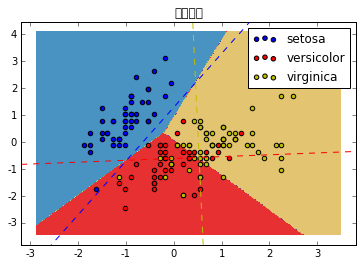

In [2]:
print(__doc__)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题  


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, n_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)
#plt.title("Decision surface of multi-class SGD")
plt.title("中文测试")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

In [16]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True).decode('utf-8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

/home/katherine/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/katherine/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


********** 可用的字体 **********


In [18]:
mat_fonts

{'Abyssinica SIL',
 'Arvo',
 'Bitstream Vera Sans',
 'Bitstream Vera Sans Mono',
 'Bitstream Vera Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'Droid Serif',
 'FontAwesome',
 'FreeMono',
 'FreeSans',
 'FreeSerif',
 'Garuda',
 'Indie Flower',
 'KacstArt',
 'KacstBook',
 'KacstDecorative',
 'KacstDigital',
 'KacstFarsi',
 'KacstLetter',
 'KacstNaskh',
 'KacstOffice',
 'KacstOne',
 'KacstPen',
 'KacstPoster',
 'KacstQurn',
 'KacstScreen',
 'KacstTitle',
 'KacstTitleL',
 'Khmer OS',
 'Khmer OS System',
 'Kinnari',
 'LKLUG',
 'Laksaman',
 'Lato',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Lobster',
 'Lohit Punjabi',
 'Loma',
 'MathJax_AMS',
 'MathJax_Caligraphic',
 'MathJax_Fraktur',
 'MathJax_Main',
 'MathJax_Math',
 'MathJax_SansSerif',
 'MathJax_Script',
 'MathJax_Size1',
 'MathJax_Size2',
 'MathJax_Size3',
 'MathJax_Size4',
 'MathJax_Typewriter',
 'MathJax_WinChrome',
 'MathJax_WinIE6',
 'NanumBarunGothic',
 'NanumGothic',

In [13]:
[f.name for f in fm.ttflist]

['cmsy10',
 'STIXSizeFourSym',
 'cmex10',
 'Bitstream Vera Sans',
 'Bitstream Vera Serif',
 'cmmi10',
 'Bitstream Vera Sans Mono',
 'STIXGeneral',
 'Bitstream Vera Sans Mono',
 'Bitstream Vera Sans',
 'Bitstream Vera Sans Mono',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'Bitstream Vera Sans Mono',
 'Bitstream Vera Serif',
 'STIXSizeTwoSym',
 'STIXSizeFiveSym',
 'cmtt10',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'cmr10',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmb10',
 'cmss10',
 'STIXSizeThreeSym',
 'Bitstream Vera Sans',
 'STIXGeneral',
 'Bitstream Vera Sans',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'Loma',
 'Padauk',
 'Norasi',
 'MathJax_Main',
 'STIXSizeFourSym',
 'Kinnari',
 'FreeMono',
 'STIXIntegralsD',
 'MathJax_Script',
 'Norasi',
 'MathJax_Size1',
 'Tlwg Typo',
 'Open Sans',
 'STIXNonUnicode',
 'Ubuntu',
 'Ubuntu Mono',
 'KacstLetter',
 'KacstPoster',
 'Droid Serif',
 'MathJax_Fraktur',
 'FreeMono',
 'FreeSans',
 'Garuda',
 'Lato